In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
x_train=train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)

x_test=test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='sparse'
)


Found 2626 images belonging to 5 classes.
Found 2626 images belonging to 5 classes.


In [4]:
print(x_train.class_indices)

print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}
{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [5]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [6]:
import numpy as np

In [7]:
import tensorflow

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Fitting the model
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5261 - accuracy: 0.4453 - val_loss: 1.2391 - val_accuracy: 0.5537
Epoch 2/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.1396 - accuracy: 0.5946 - val_loss: 1.0521 - val_accuracy: 0.6283
Epoch 3/5
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9853 - accuracy: 0.6526 - val_loss: 0.9465 - val_accuracy: 0.6697
Epoch 4/5
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8846 - accuracy: 0.6891 - val_loss: 0.9057 - val_accuracy: 0.6861
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8164 - accuracy: 0.7127 - val_loss: 0.8918 - val_accuracy: 0.6922


In [13]:
#Saving our model
model.save('nutrition.h5')

In [16]:
#Prediciting our results
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('nutrition.h5')

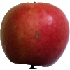

In [17]:
img=image.load_img('/content/drive/MyDrive/Dataset/TEST_SET/APPLES/151_100.jpg',target_size=(70,70))
img

In [18]:
x= image.img_to_array(img)

In [19]:
x = np.expand_dims(x, axis=0)

In [20]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']
result=str(index[0])
result

'APPLES'